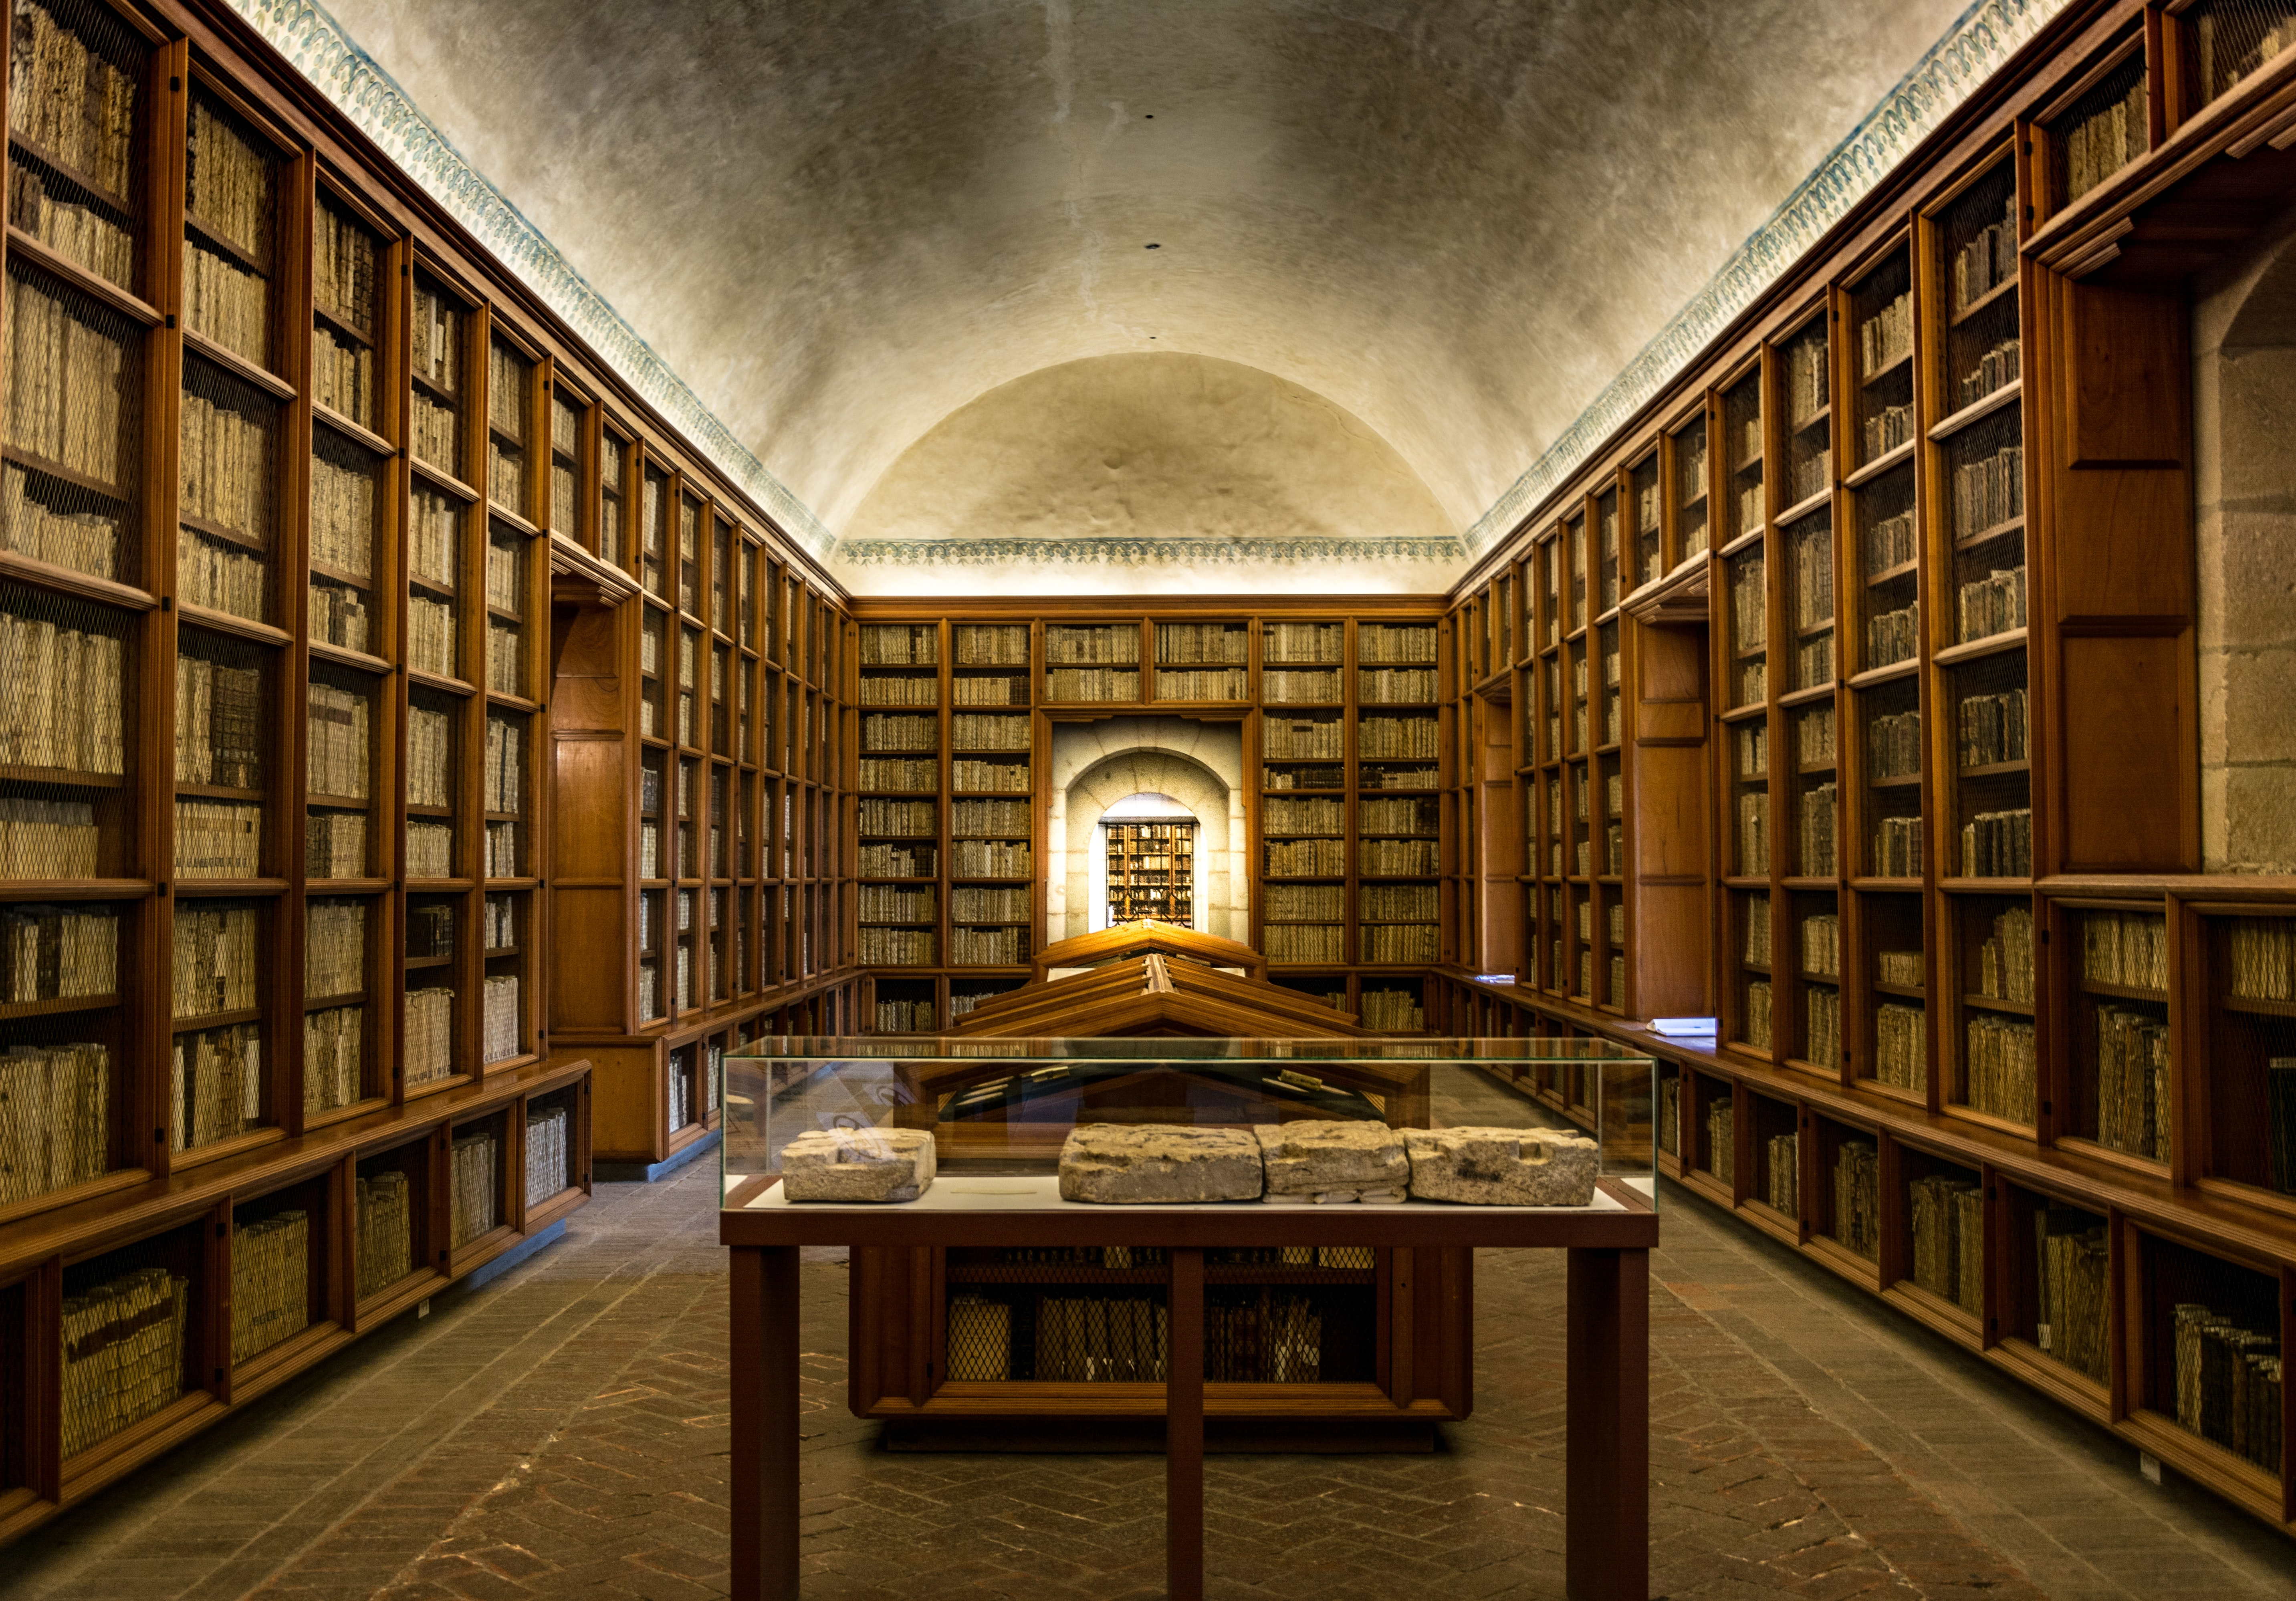
# Hidden treasures of Python: rarely used libraries

There are so many thousands of libraries in the Python programming language that the title of this article can be essentially related to almost all of them, except for a couple of hundreds. Describing all the Python libraries would probably require a real book library. In this article, though, we’re going to focus on getting a taste of a few ones, designed to solve certain specific tasks or used for fun.

To practice our libraries, we’ll download a dataset from Kaggle – [Animal Care and Control Adopted Animals](https://www.kaggle.com/jinbonnie/animal-data).

In [1]:
import pandas as pd
df = pd.read_csv('animal-data-1.csv')
print('Number of pets:', len(df), 2*'\n', 
      df.columns)
df.head()

Number of pets: 10290 

 Index(['id', 'intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'identichipnumber', 'animalname', 'breedname', 'basecolour',
       'speciesname', 'animalage', 'sexname', 'location', 'movementdate',
       'movementtype', 'istrial', 'returndate', 'returnedreason',
       'deceaseddate', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'isdoa'],
      dtype='object')


id           intakedate intakereason  istransfer sheltercode  \
0  15801  2009-11-28 00:00:00       Moving           0   C09115463   
1  15932  2009-12-08 00:00:00       Moving           0   D09125594   
2  28859  2012-08-10 00:00:00    Abandoned           0   D12082309   
3  30812  2013-01-11 00:00:00    Abandoned           0    C1301091   
4  30812  2013-01-11 00:00:00    Abandoned           0    C1301091   

  identichipnumber   animalname                breedname  \
0       0A115D7358       Jadzia      Domestic Short Hair   
1       0A11675477        Gonzo  German Shepherd Dog/Mix   
2       0A13253C7B       Maggie  Shep Mix/Siberian Husky   
3       0A13403D4D  Pretty Girl      Domestic Short Hair   
4       0A13403D4D  Pretty Girl      Domestic Short Hair   

             basecolour speciesname  ...         movementdate movementtype  \
0                Tortie         Cat  ...  2017-05-13 00:00:00     Adoption   
1                   Tan         Dog  ...  2017-04-24 00:00:00     Adoption   
2               Various         Dog  ...  2017-04-15 00:00:00     Adoption   
3  Dilute tortoiseshell         Cat  ...  2017-04-18 00:00:00       Foster   
4  Dilute tortoiseshell         Cat  ...  2018-05-29 00:00:00     Adoption   

  istrial           returndate returnedreason  deceaseddate deceasedreason  \
0     0.0                  NaN          Stray           NaN   Died in care   
1     0.0                  NaN          Stray           NaN   Died in care   
2     0.0                  NaN          Stray           NaN   Died in care   
3     0.0  2018-05-29 00:00:00          Stray           NaN   Died in care   
4     0.0                  NaN          Stray           NaN   Died in care   

  diedoffshelter puttosleep isdoa  
0              0          0     0  
1              0          0     0  
2              0          0     0  
3              0          0     0  
4              0          0     0  

[5 rows x 23 columns]

## 1. `Missingno`
*Library installation:* `pip install missingno`
***
Missingno is a special library for displaying missing values in a dataframe. Of course, we can use for this purpose a seaborn heatmap or a bar plot from any visualization library. However, in such cases, we'll have to create first a series containing missing values in each column using `df.isnull().sum()`, while missingno does everything under the hood. This library offers a few types of charts: 
- `matrix` displays density patterns in data completion for up to 50 columns of a dataframe, and it is analogous to the seaborn missing value heatmap. Also, by means of the sparkline at right, it shows  the general shape of the data completeness by row, emphasizing the rows with the maximum and minimum nullity.
- `bar chart` shows nullity visualization in bars by column. 
- `heatmap` measures nullity correlation that ranges from -1 to 1. Essentially, it shows how strongly the presence or absence of one variable affects the presence of another. Columns with no missing values, or just the opposite, completely empty, are excluded from the visualization, having no meaningful correlation.
- `dendrogram`, like the heatmap, measures nullity relationships between columns, but in this case not pairwise but between groups of columns, detecting clusters of missing data. Those variables that are located closer on the chart show a stronger nullity correlation. For dataframes with less than 50 columns the dendrogram is vertical, otherwise, it flips to a horizontal.

Let's try all these charts with their default settings on our pet dataset:

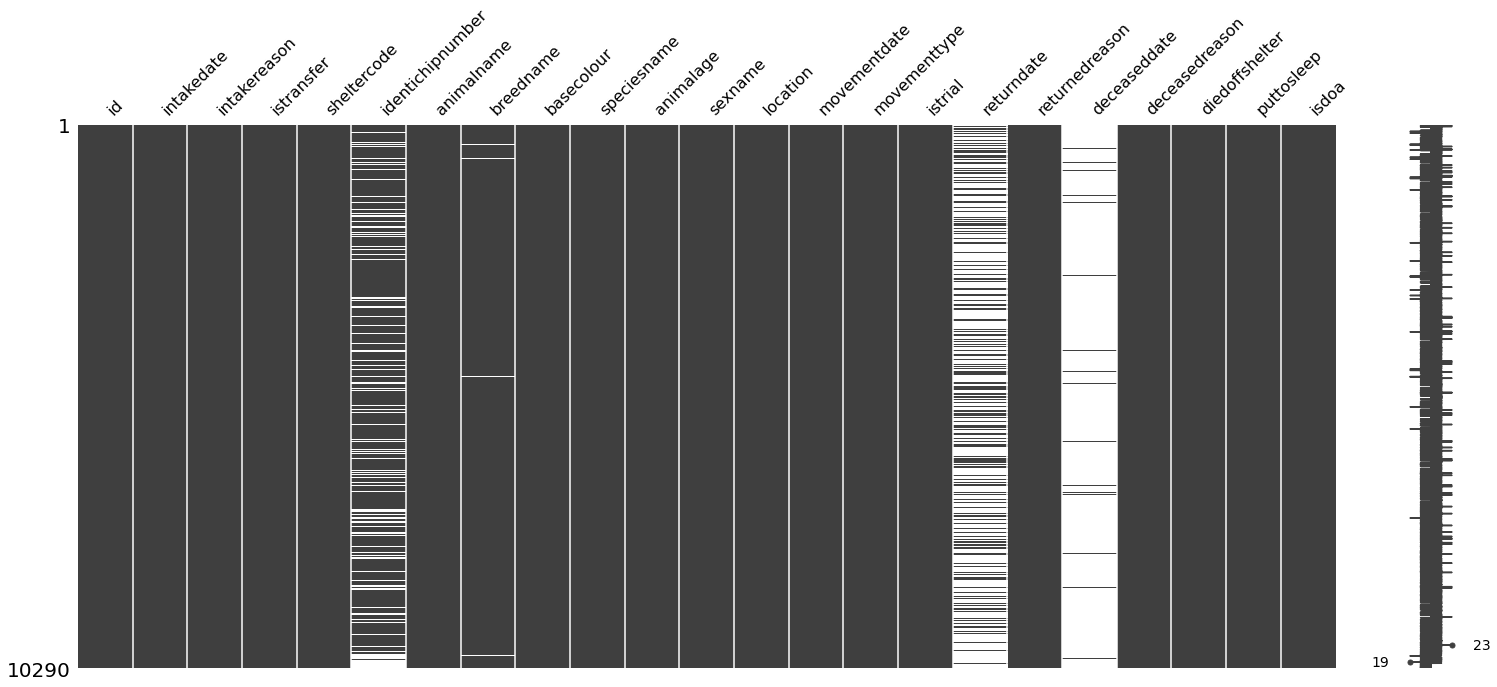

In [2]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

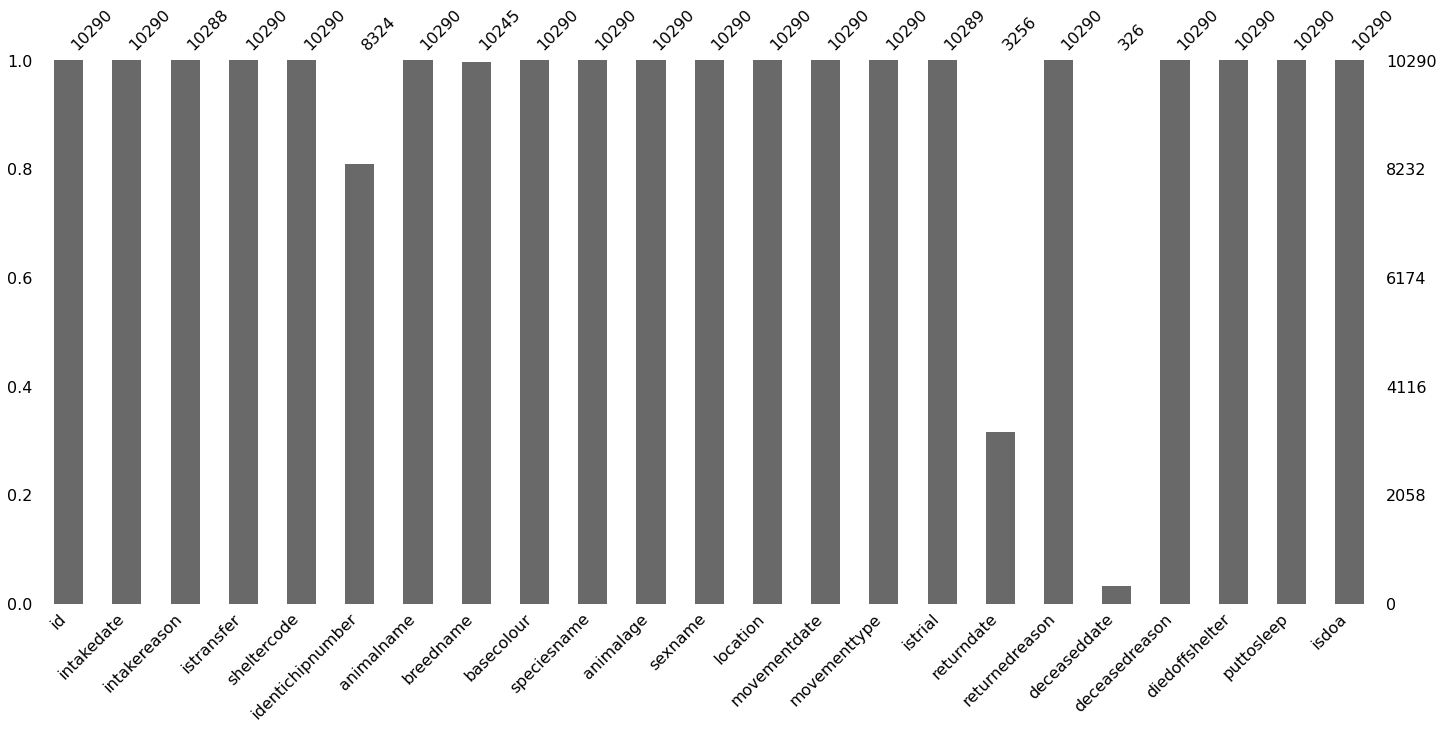

In [3]:
msno.bar(df)

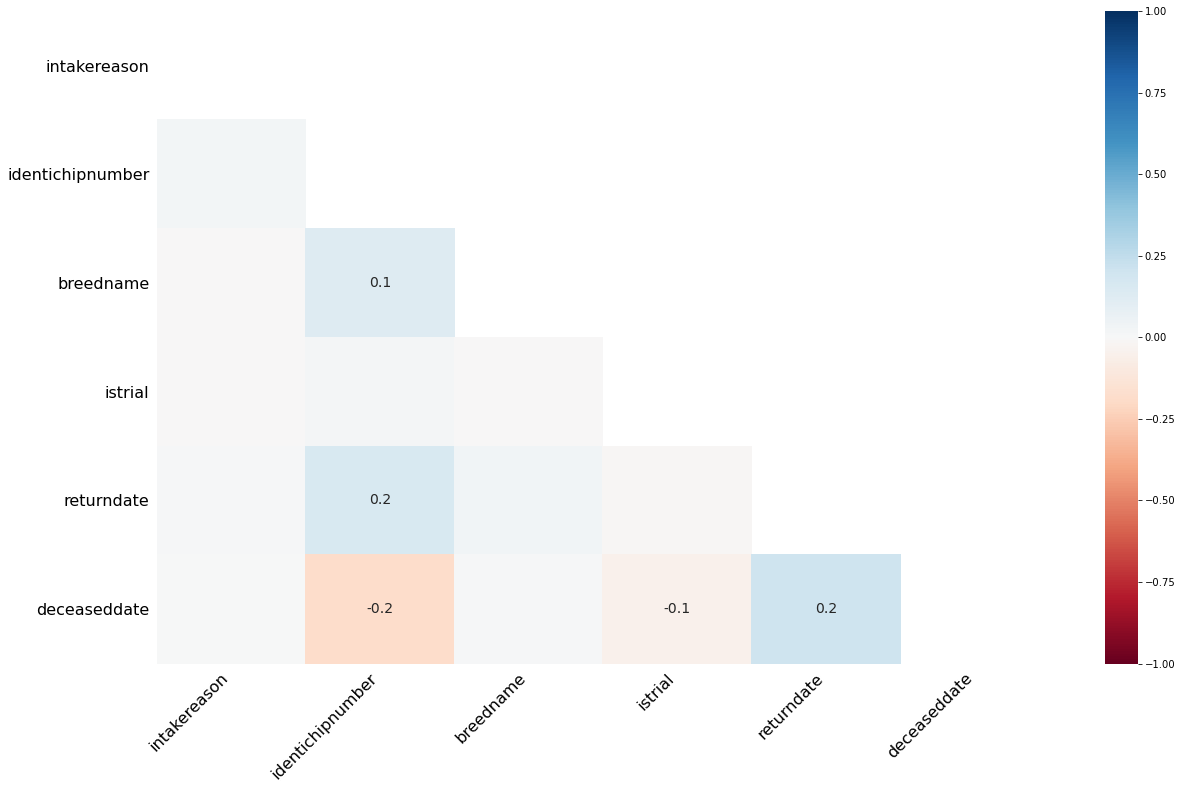

In [4]:
msno.heatmap(df)

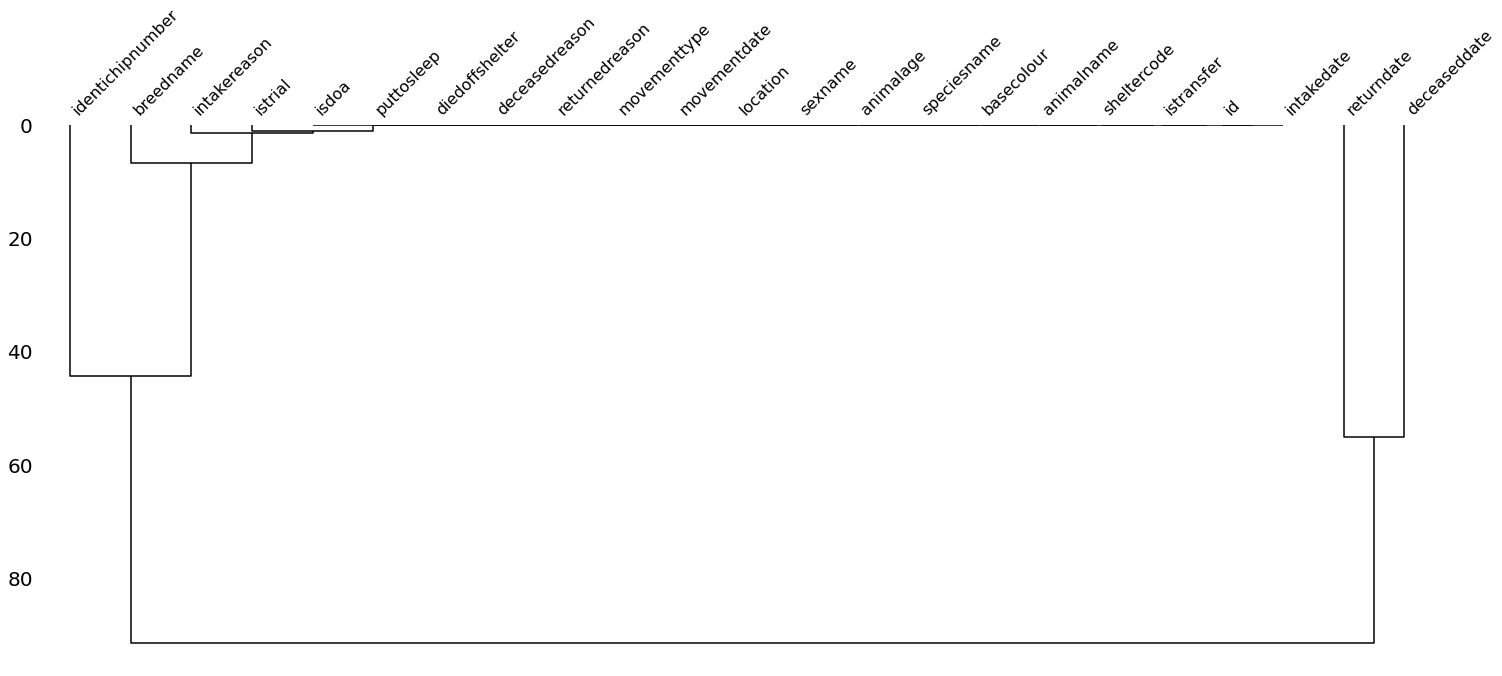

In [5]:
msno.dendrogram(df)

We can make the following observations about the dataset:
- In general, there are rather few missing values. 
- The most empty columns are `deceaseddate` and `returndate`, meaning that, fortunately, the great majority of our animals is, for now, alive, and that only a low percentage of the adopted ones was returned to the shelter. 
- The majority of pets are chipped. 
- Nullity correlation:
    - slightly negative between being chipped and being dead, 
    - slightly positive – being chipped vs. being returned, being returned vs. being dead.
    
There are a few options to customize missingno charts: `figsize`, `fontsize`, `sort` (sorts the rows by completeness, in either ascending or descending order), `labels` (can be `True` or `False`, meaning whether to show or not the column labels). Some parameters are chart-specific: `color` for matrix and bar charts, `sparkline` (whether to draw it or not) and `width_ratios` (matrix width to sparkline width) for matrix, `log` (logarithmic scale) for bar charts, `cmap` colormap for heatmap, `orientation` for dendrogram. Let's apply some of them to one of our charts above:

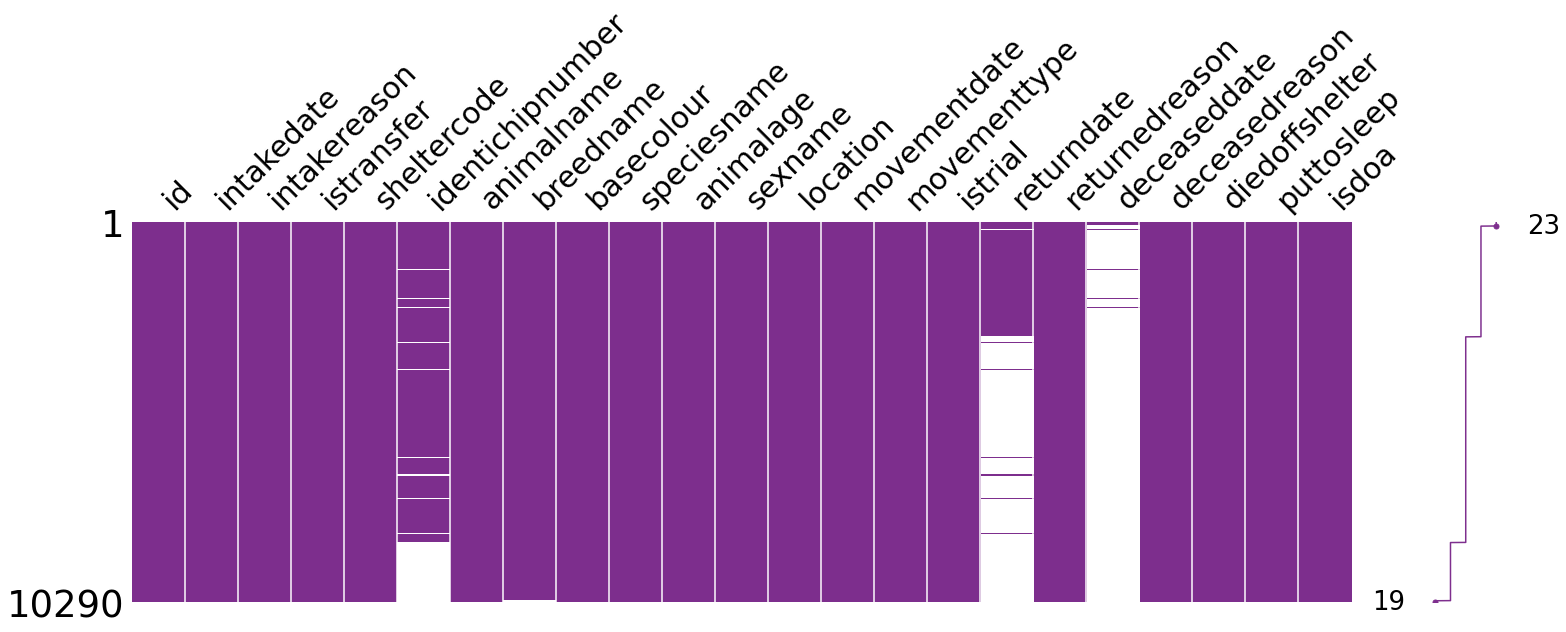

In [6]:
msno.matrix(
            df, 
            figsize=(25,7),
            fontsize=30, 
            sort='descending',
            color=(0.494, 0.184, 0.556), 
            width_ratios=(10, 1)
            ) 

Finally, if there is still something we would like to tune, we can always add any functionality of matplotlib to the missingno graphs. To do this, we should add the parameter `inline` and assign it to  ` False`. Let's add a title to our matrix chart:

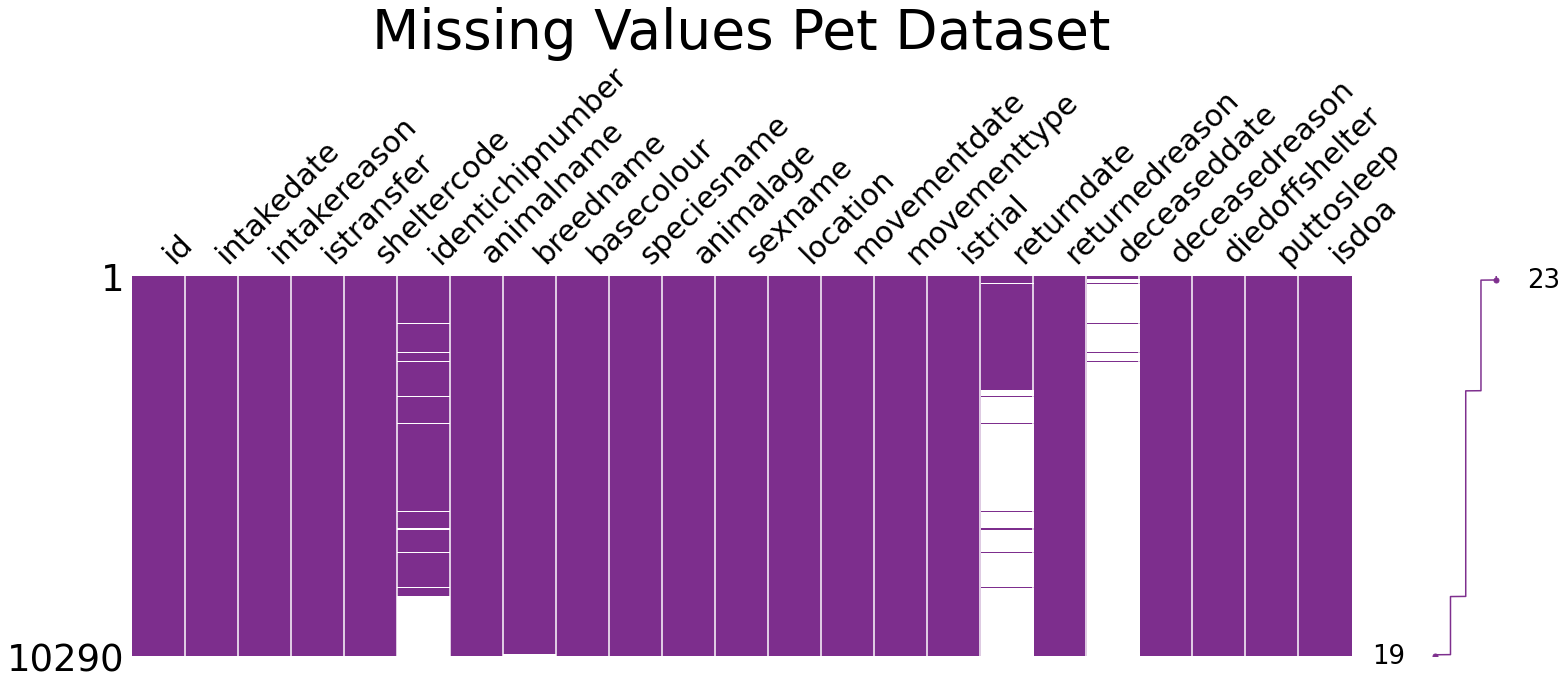

In [7]:
import matplotlib.pyplot as plt
msno.matrix(
            df, 
            figsize=(25,7),
            fontsize=30, 
            sort='descending',
            color=(0.494, 0.184, 0.556), 
            width_ratios=(10, 1),
            inline=False
            ) 
plt.title('Missing Values Pet Dataset', fontsize=55)
plt.show()

[Missingno Documentation](https://github.com/ResidentMario/missingno)

## 2.  `Tabulate`
*Library installation:* `pip install tabulate`
***
This library serves for pretty-printing tabular data in Python. It allows smart and customizable column alignment, number and text formatting, alignment by a decimal point.

The `tabulate()` function takes a tabular data type (dataframe, list of lists or dictionaries, dictionary, NumPy array), some other optional parameters, and outputs a nicely formatted table. Let's practice it on a fragment of our pet dataset, starting with the most basic pretty-printed table:

In [8]:
from tabulate import tabulate
df_pretty_printed = df.iloc[:5, [6,7,9, 10,11]]
print(tabulate(df_pretty_printed))

-  -----------  -----------------------  ---  ------------------  ------
0  Jadzia       Domestic Short Hair      Cat  9 years 2 months.   Female
1  Gonzo        German Shepherd Dog/Mix  Dog  9 years 1 month.    Male
2  Maggie       Shep Mix/Siberian Husky  Dog  6 years 8 months.   Female
3  Pretty Girl  Domestic Short Hair      Cat  8 years 11 months.  Female
4  Pretty Girl  Domestic Short Hair      Cat  8 years 11 months.  Female
-  -----------  -----------------------  ---  ------------------  ------


We can add a `headers` parameter to our table. If we assign `headers='firstrow'`, the first row of data is used, if `headers='keys'` – the keys of a dataframe / dictionary. For table formatting, we can use a `tablefmt` parameter, which can take one of the numerous options (assigned as a string): `simple`, `github`, `grid`, `fancy_grid`, `pipe`, `orgtbl`, `jira`, `presto`, `pretty`, `psql`, `rst`, `mediawiki`, `moinmoin`, `youtrack`, `html`, `latex`, `latex_raw`, `latex_booktabs`, `textile`.

By default, tabulate aligns columns containing float numbers by a decimal point, integers – to the right, text columns – to the left. This can be overridden by using `numalign` and `stralign` parameters (`right`, `center`, `left`, `decimal` for numbers, or `None`). For text columns, it's possible to disable the default leading and trailing whitespace removal.

Let's customize our table:

In [9]:
print(tabulate(
               df_pretty_printed, 
               headers='keys',
               tablefmt='fancy_grid',
               stralign='center',
               numalign='center'
               ))

╒════╤══════════════╤═════════════════════════╤═══════════════╤════════════════════╤═══════════╕
│    │  animalname  │        breedname        │  speciesname  │     animalage      │  sexname  │
╞════╪══════════════╪═════════════════════════╪═══════════════╪════════════════════╪═══════════╡
│ 0  │    Jadzia    │   Domestic Short Hair   │      Cat      │ 9 years 2 months.  │  Female   │
├────┼──────────────┼─────────────────────────┼───────────────┼────────────────────┼───────────┤
│ 1  │    Gonzo     │ German Shepherd Dog/Mix │      Dog      │  9 years 1 month.  │   Male    │
├────┼──────────────┼─────────────────────────┼───────────────┼────────────────────┼───────────┤
│ 2  │    Maggie    │ Shep Mix/Siberian Husky │      Dog      │ 6 years 8 months.  │  Female   │
├────┼──────────────┼─────────────────────────┼───────────────┼────────────────────┼───────────┤
│ 3  │ Pretty Girl  │   Domestic Short Hair   │      Cat      │ 8 years 11 months. │  Female   │
├────┼──────────────┼─────────

[Tabulate Documentation](https://pypi.org/project/tabulate/)

## 3. `Wikipedia`
*Library installation:* `pip install wikipedia`
***
Wikipedia library, as its name suggests, facilitates accessing and fetching information from Wikipedia. Some of the tasks that can be accomplished with it include:
- searching Wikipedia – `search()`, 
- getting article summaries – `summary`, 
- getting full page contents including images, links, any other metadata of a Wikipedia page – `page()`, 
- selecting the language of a page – `set_lang()`.

In the pretty-printed table above, we saw a dog breed called "Siberian Husky". As an exercise, we'll set the language to Russian (my native language 🙂) and search for some suggestions of the corresponding Wikipedia pages:

In [10]:
import wikipedia 
wikipedia.set_lang('ru') 
print(wikipedia.search('Siberian Husky')) 

['Сибирский хаски', 'Древние породы собак', 'Маккензи Ривер Хаски', 'Породы собак по классификации кинологических организаций', 'Ричардсон, Кевин Майкл']


Let's take the first suggestion and fetch the first sentence of that page's summary:

In [11]:
print(wikipedia.summary('Сибирский хаски', sentences=1)) 

Сибирский хаски — заводская специализированная порода собак, выведенная чукчами северо-восточной части Сибири и зарегистрированная американскими кинологами в 1930-х годах как ездовая собака, полученная от аборигенных собак Дальнего Востока России, в основном из Анадыря, Колымы, Камчатки у местных оседлых приморских племён — юкагиров, кереков, азиатских эскимосов и приморских чукчей — анкальын (приморские, поморы — от анкы (море)).


Now, we're going to get a link to a picture of Husky from this page:

In [12]:
print(wikipedia.page('Сибирский хаски').images[0])

https://upload.wikimedia.org/wikipedia/commons/a/a3/Black-Magic-Big-Boy.jpg


and visualize this beautiful creature:

![Husky](https://upload.wikimedia.org/wikipedia/commons/a/a3/Black-Magic-Big-Boy.jpg)

[Wikipedia Documentation](https://wikipedia.readthedocs.io/en/latest/code.html#api)

## 4. `Wget`
*Library installation:* `pip install wget`
***
Wget library allows downloading files in Python without the necessity to open them. We can add also a path where to save this file as a second argument.

Let's download the picture of Husky above:  

In [13]:
import wget
wget.download('https://upload.wikimedia.org/wikipedia/commons/a/a3/Black-Magic-Big-Boy.jpg')

'Black-Magic-Big-Boy.jpg'

Now we can find the picture in the same folder as this notebook, since we didn't specify a path where to save it.

Since any webpage on the Internet is actually a HTML file, another very useful application of this library is to crawl the whole webpage, with all its elements. Let's download the Kaggle webpage where our dataset is located:

In [14]:
wget.download('https://www.kaggle.com/jinbonnie/animal-data')

'animal-data'

The resulting `animal-data` file looks like the following (we'll display only several first rows):
```
<!DOCTYPE html>
<html lang="en">
<head>
    <title>Animal Care and Control Adopted Animals | Kaggle</title>
    <meta charset="utf-8" />
    <meta name="robots" content="index, follow" />
    <meta name="description" content="animal situation in Bloomington Animal Shelter from 2017-2020" />
    <meta name="turbolinks-cache-control" content="no-cache" />
```

[Wget Documentation](https://pypi.org/project/wget/)

## 5.  `Faker`
*Library installation:* `pip install Faker`
***
This module is used to generate fake data, including names, addresses, emails, phone numbers, jobs, texts, sentences, colors, currencies, etc. The faker generator can take a locale as an argument (the default is en_US locale), to return localized data. For generating a piece of text or a sentence, we can use the default lorem ipsum; alternatively, we can provide our own set of words. To ensure that all the created values are unique for some specific instance (for example, when we want to create a long list of fake names), the `.unique` property is applied. If instead, it's necessary to produce the same value or data set, the `seed()` method is used.

Let's look at some examples.

In [15]:
from faker import Faker
fake = Faker()

print(
      'Fake color:', fake.color(), '\n'
      'Fake job:',   fake.job(),   '\n'
      'Fake email:', fake.email(), '\n'
      )

# Printing a list of 5 fake Korean and Portuguese addresses
fake = Faker(['ko_KR', 'pt_BR'])
for _ in range(5):
    print(fake.unique.address())     # using the `.unique` property  

print('\n')

# Assigning a seed number to print always the same value / data set
fake = Faker()
Faker.seed(3920)
print('This English fake name is always the same:', fake.name())

Fake color: #961240 
Fake job: Outdoor activities/education manager 
Fake email: stephanierivera@phillips-rodriguez.net 

Travessa de da Cunha, 5
Goiania
76132-195 da Mata de Pinto / PR
Esplanada Jesus
Vila Calafate
75685267 Silveira / AM
Aeroporto Agatha Vieira, 30
Sagrada Família
59959-437 Azevedo da Praia / RO
충청북도 가평군 서초중앙5길 (성훈이읍)
Estrada Pinto, 49
Baleia
89619395 Monteiro / SP


This English fake name is always the same: Kim Lopez


Returning to our dataset, we found out that there are at least two unlucky pets with not really nice names:

In [16]:
df_bad_names = df[df['animalname'].str.contains('Stink|Pooh')]\
                 .style.set_properties(**{'background-color': 'yellow'},   # column emphasizing
                                       subset=['animalname']) 
df_bad_names

The dog from the last 2 rows is actually the same one, returned to the shelter because of being incompatible with the owner's lifestyle. With our new skills, let’s save the reputation of both animals and rename them into something more decent. Since the dog is a German Shepherd, we'll select a German name for her. As for the cat, according to this [Wikipedia page](https://en.wikipedia.org/wiki/Domestic_short-haired_cat), Domestic Short Hair is the most common breed in the US, so for him, we'll select an English name.

In [17]:
# Defining a function to rename the unlucky pets
def rename_pets(name):
    if name == 'Stinker':
        fake = Faker()
        Faker.seed(162)   
        name = fake.name()
    if name == 'Pooh':
        fake = Faker(['de_DE'])
        Faker.seed(20387)
        name = fake.name()
    return name

# Renaming the pets
df['animalname'] = df['animalname'].apply(rename_pets)

# Checking the results
df.iloc[df_bad_names.index.tolist(), :]\
  .style.set_properties(**{'background-color': 'yellow'},     # column emphasizing
                        subset=['animalname'])       

Steven Harris and Helena Fliegner-Karz sound a little bit too bombastic for a cat and a dog, but definitely much better than their previous names!

[Faker Documentation](https://faker.readthedocs.io/en/master/)

## 6. `Numerizer`
*Library installation:* `pip install numerizer`
***
This small Python package is used for converting natural language numerics into numbers (integers and floats) and consists of only one function – `numerize()`.

Let's try it right now on our dataset. Some pets' names contain numbers:

In [18]:
df_numerized_names = df[df['animalname'].str.contains('Two|Seven|Fifty')]\
                       .style.set_properties(**{'background-color': 'yellow'}, # column emphasizing
                                             subset=['animalname'])       
df_numerized_names

We're going to convert the numeric part of these names into real numbers:

In [19]:
from numerizer import numerize
df['animalname'] = df['animalname'].apply(lambda x: numerize(x))
df.iloc[df_numerized_names.index.tolist(), :]\
  .style.set_properties(**{'background-color': 'yellow'},    # column emphasizing
                        subset=['animalname'])     

[Numerizer Documentation](https://pypi.org/project/numerizer/)
## 7. `Emoji`
*Library installation:* `pip install emoji`
****
By means of this library, we can convert strings to emoji, according to the Emoji codes as defined by the [Unicode Consortium](http://www.unicode.org/emoji/charts/full-emoji-list.html), and, if specified `use_aliases=True`, complemented with the [aliases](https://www.webfx.com/tools/emoji-cheat-sheet/). The emoji package has only two functions: `emojize()` and `demojize()`. The default English language (`language='en'`) can be changed to Spanish (es), Portuguese (pt), or Italian (it).

In [20]:
import emoji
print(emoji.emojize(':koala:'))
print(emoji.demojize('🐨'))
print(emoji.emojize(':rana:', language='it'))

🐨
:koala:
🐸


Let's emojize our animals. First, we'll check their unique species names:

In [21]:
print(df['speciesname'].unique())

['Cat' 'Dog' 'House Rabbit' 'Rat' 'Bird' 'Opossum' 'Chicken' 'Wildlife'
 'Ferret' 'Tortoise' 'Pig' 'Hamster' 'Guinea Pig' 'Gerbil' 'Lizard'
 'Hedgehog' 'Chinchilla' 'Goat' 'Snake' 'Squirrel' 'Sugar Glider' 'Turtle'
 'Tarantula' 'Mouse' 'Raccoon' 'Livestock' 'Fish']


We have to convert these names into lower case, add leading and trailing colons to each, and then apply `emojize()` to the result:

In [22]:
df['speciesname'] = df['speciesname'].apply(lambda x: emoji.emojize(f':{x.lower()}:', 
                                                                    use_aliases=True))
print(df['speciesname'].unique())

['🐱' '🐶' ':house rabbit:' '🐀' '🐦' ':opossum:' '🐔' ':wildlife:' ':ferret:'
 ':tortoise:' '🐷' '🐹' ':guinea pig:' ':gerbil:' '🦎' '🦔' ':chinchilla:' '🐐'
 '🐍' ':squirrel:' ':sugar glider:' '🐢' ':tarantula:' '🐭' '🦝' ':livestock:'
 '🐟']


Let's rename the house rabbit, tortoise, and squirrel into their synonyms comprehensible for the emoji library and try emojizing them again:

In [23]:
df['speciesname'] = df['speciesname'].str.replace(':house rabbit:', ':rabbit:')\
                                         .replace(':tortoise:', ':turtle:')\
                                         .replace(':squirrel:', ':chipmunk:')
df['speciesname'] = df['speciesname'].apply(lambda x: emoji.emojize(x, variant='emoji_type'))
print(df['speciesname'].unique())

['🐱' '🐶' '🐇️' '🐀' '🐦' ':opossum:️' '🐔' ':wildlife:️' ':ferret:️' '🐢️' '🐷'
 '🐹' ':guinea pig:' ':gerbil:️' '🦎' '🦔' ':chinchilla:️' '🐐' '🐍' '🐿️'
 ':sugar glider:' '🐢' ':tarantula:️' '🐭' '🦝' ':livestock:️' '🐟']


The remaining species are or collective names (wildlife and livestock), or don't have an emoji equivalent, at least not yet. We'll leave them as they are, removing only the colons and converting them back into title case:

In [24]:
df['speciesname'] = df['speciesname'].str.replace(':', '').apply(lambda x: x.title())
print(df['speciesname'].unique())
df.head()

['🐱' '🐶' '🐇️' '🐀' '🐦' 'Opossum️' '🐔' 'Wildlife️' 'Ferret️' '🐢️' '🐷' '🐹'
 'Guinea Pig' 'Gerbil️' '🦎' '🦔' 'Chinchilla️' '🐐' '🐍' '🐿️' 'Sugar Glider'
 '🐢' 'Tarantula️' '🐭' '🦝' 'Livestock️' '🐟']


id           intakedate intakereason  istransfer sheltercode  \
0  15801  2009-11-28 00:00:00       Moving           0   C09115463   
1  15932  2009-12-08 00:00:00       Moving           0   D09125594   
2  28859  2012-08-10 00:00:00    Abandoned           0   D12082309   
3  30812  2013-01-11 00:00:00    Abandoned           0    C1301091   
4  30812  2013-01-11 00:00:00    Abandoned           0    C1301091   

  identichipnumber   animalname                breedname  \
0       0A115D7358       Jadzia      Domestic Short Hair   
1       0A11675477        Gonzo  German Shepherd Dog/Mix   
2       0A13253C7B       Maggie  Shep Mix/Siberian Husky   
3       0A13403D4D  Pretty Girl      Domestic Short Hair   
4       0A13403D4D  Pretty Girl      Domestic Short Hair   

             basecolour speciesname  ...         movementdate movementtype  \
0                Tortie           🐱  ...  2017-05-13 00:00:00     Adoption   
1                   Tan           🐶  ...  2017-04-24 00:00:00     Adoption   
2               Various           🐶  ...  2017-04-15 00:00:00     Adoption   
3  Dilute tortoiseshell           🐱  ...  2017-04-18 00:00:00       Foster   
4  Dilute tortoiseshell           🐱  ...  2018-05-29 00:00:00     Adoption   

  istrial           returndate returnedreason  deceaseddate deceasedreason  \
0     0.0                  NaN          Stray           NaN   Died in care   
1     0.0                  NaN          Stray           NaN   Died in care   
2     0.0                  NaN          Stray           NaN   Died in care   
3     0.0  2018-05-29 00:00:00          Stray           NaN   Died in care   
4     0.0                  NaN          Stray           NaN   Died in care   

  diedoffshelter puttosleep isdoa  
0              0          0     0  
1              0          0     0  
2              0          0     0  
3              0          0     0  
4              0          0     0  

[5 rows x 23 columns]

[Emoji Documentation](https://pypi.org/project/emoji/)
## 8. `PyAztro`
*Library installation:* `pip install pyaztro`
***
PyAztro seems to be designed more for fun than for work. This library provides a horoscope for each zodiac sign. The prediction includes the description of a sign for that day, date range of that sign, mood, lucky number, lucky time, lucky color, compatibility with other signs. For example:

In [25]:
import pyaztro
pyaztro.Aztro(sign='taurus').mood

NameError: name 'pyaztro' is not defined

Well, not that bad! 😀

In our dataset, there are a cat and a dog called Aries, and plenty of cats and dogs called Leo:

In [ ]:
df[(df['animalname'] == 'Aries')|(df['animalname'] == 'Leo')]\
  .style.set_properties(**{'background-color': 'yellow'},     # column emphasizing
                        subset=['animalname'])       

Let's assume that those are their corresponding zodiac signs 😉 With PyAztro, we can check what the stars have prepared for these animals for today:

In [ ]:
leo = pyaztro.Aztro(sign=df.loc[2372, 'animalname'])
aries = pyaztro.Aztro(sign=df.loc[3036, 'animalname'])

print('LEO: \n',
      'Sign:',             leo.sign,            '\n',
      'Current date:',     leo.current_date,    '\n',
      'Date range:',       leo.date_range,      '\n', 
      'Sign description:', leo.description,     '\n',
      'Mood:',             leo.mood,            '\n', 
      'Compatibility:',    leo.compatibility,   '\n',
      'Lucky number:',     leo.lucky_number,    '\n',
      'Lucky time:',       leo.lucky_time,      '\n',
      'Lucky color:',      leo.color,         2*'\n',     

      'ARIES: \n',
      'Sign:',             aries.sign,          '\n',
      'Current date:',     aries.current_date,  '\n',
      'Date range:',       aries.date_range,    '\n', 
      'Sign description:', aries.description,   '\n',
      'Mood:',             aries.mood,          '\n', 
      'Compatibility:',    aries.compatibility, '\n',
      'Lucky number:',     aries.lucky_number,  '\n',
      'Lucky time:',       aries.lucky_time,    '\n',
      'Lucky color:',      aries.color)

These forecasts are valid for 04.02.2021, so if you want to check our pets' horoscope (or maybe your own one) for the current day, you have to re-run the code above. All the properties, apart from, evidently, `sign` and `date_range`, change every day for each zodiac sign at midnight GTM.

[PyAztro Documentation](https://github.com/sameerkumar18/pyaztro)

***

Certainly, there are many other funny Python libraries like PyAztro, including:
- **[Art](https://pypi.org/project/art/)** – for converting text to ASCII art, like this:  ʕ •`ᴥ•´ʔ
- **[Turtle](https://docs.python.org/3/library/turtle.html)** – for drawing,
- **[Chess](https://pypi.org/project/chess/)** – for playing chess,
- **[Santa](https://pypi.org/project/santa/)** – for randomly pairing Secret Santa gifters and recipients,

and even
- **[Pynder](https://pypi.org/project/pynder/)** – for using Tinder.

We can be sure that with Python we'll never get bored!

## Conclusion
To sum up, I'd like to wish all the pets from the dataset to find their loving and caring owners, and to the Python users – to discover more amazing libraries and apply them to their projects.  